In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('data.csv')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age (Kyr ago)      373 non-null    float64
 1   Rescaled MST (°C)  373 non-null    float64
 2   BIT index          373 non-null    float64
 3   Unnamed: 3         0 non-null      float64
 4   Gasage (yr BP)     951 non-null    float64
 5   CO2 (ppmv)         951 non-null    float64
 6   Unnamed: 6         0 non-null      float64
 7   Age (ka BP)        2174 non-null   float64
 8   δ18O               2174 non-null   float64
 9   Unnamed: 9         0 non-null      float64
 10  EDC3 Age (kyr)     1401 non-null   float64
 11  GLT_syn            1401 non-null   float64
 12  Unnamed: 12        0 non-null      float64
 13  age_calkaBP        76 non-null     float64
 14  d18O_benthic       76 non-null     float64
dtypes: float64(15)
memory usage: 254.9 KB


In [15]:
#data.plot.scatter( x = 'Age (Kyr ago)',y = 'Rescaled MST (°C)' )
x = data[data.columns[4]].to_numpy()
y = data[data.columns[5]].to_numpy()
#plt.plot(x )
#plt.xlim(0, 75000)
#plt.show()

In [16]:
test_age = data[data.columns[0]].to_numpy()
age = test_age[: 373]

In [17]:
age.shape
#print(age)

(373,)

In [18]:
test_age = data[data.columns[4]].to_numpy()
test_co2 = data[data.columns[5]].to_numpy()
gasage = test_age[: 951]  
co2 = test_co2[: 951]

In [129]:
j = 0
new_co2 = np.empty_like(age)
for i in range(age.shape[0]):
    j = np.argmin(np.abs(gasage - age[i] * 1000), axis = 0)
    if(j == 0 or j == gasage.shape[0] - 1 ):
        new_co2[i] = co2[j]
    elif(age[i] * 1000 >= gasage[j]):
        new_co2[i] = np.interp(age[i] * 1000, [gasage[j], gasage[j + 1]], [co2[j], co2[j + 1 ]])
    elif(age[i] * 1000 < gasage[j]):
        new_co2[i] = np.interp(age[i] * 1000, [gasage[j - 1], gasage[j]], [co2[j - 1], co2[j]])
    print(new_co2[i], co2[j])
#print(new_co2[1])
print(np.argmin(gasage))
print(co2[655])
#plt.plot(co2)
#plt.plot(new_co2)
#plt.xlim(0, 380)
#plt.ylim(150, 350)
print(age.shape[0])

350.8516379310345 350.81
286.5047368421053 286.33
284.0133938547486 284.43
276.7172012917115 276.69
283.73295443164744 283.53
280.8897131147541 280.91
279.7007692307692 278.43
284.1676173402868 284.51
277.884609375 277.41
279.46033527198085 279.72
279.48372280919824 279.59
277.08993965806235 277.11
281.4504198089492 281.69
277.4916666666667 277.5
277.4093005872931 276.9
276.7060193072118 276.7
277.33188142770723 277.6
277.8567441860465 277.9
274.64446930151627 273.9
276.52572898799315 275.3
275.6198102552519 276.3
274.97051172600817 274.6
274.6650554958826 273.1
274.6059483379644 275.0
273.02786516853934 273.0
274.1210910565808 275.4
273.73080446607497 274.9
272.5136699143785 272.8
271.40186089481324 271.5
269.19198389458273 269.1
271.05313047634223 271.5
270.97638326585695 270.7
268.9778443113773 269.3
269.5398391258158 269.8
265.29291567087745 265.3
265.5354301187253 265.2
266.3590607452782 265.9
265.50955097728473 265.5
266.2936746654871 266.7
264.4138015555032 265.5
261.93184444791

In [20]:
test1_age = data[data.columns[7]].to_numpy()
test1_s180 = data[data.columns[8]].to_numpy()
age_kp = test1_age[: 2174]  
s180 = test1_s180[: 2174]

In [21]:
j = 0
new_s180 = np.empty_like(age)
for i in range(age.shape[0]):
    j = np.argmin(np.abs(age_kp - age[i]), axis = 0)
    if(j == 0 or j == age_kp.shape[0] - 1):
        new_s180[i] = s180[j]
    elif(age[i]  >= age_kp[j]):
        new_s180[i] = np.interp(age[i], [age_kp[j], age_kp[j + 1]], [s180[j], s180[j + 1 ]])
    elif(age[i]  < age_kp[j]):
        new_s180[i] = np.interp(age[i], [age_kp[j - 1], age_kp[j]], [s180[j - 1], s180[j]])
    #print(i, j, np.round(new_s180[i], 2), s180[j])
#print(new_co2[1])
print(np.argmin(s180))

538


In [22]:
test2_age = data[data.columns[10]].to_numpy()
test2_GLT = data[data.columns[11]].to_numpy()
age_edc = test2_age[: 1401]  
GLT = test2_GLT[: 1401]

In [23]:
j = 0
new_GLT = np.empty_like(age)
for i in range(age.shape[0]):
    j = np.argmin(np.abs(age_edc - age[i]), axis = 0)
    if(j == 0 or j == age_edc.shape[0] - 1):
        new_GLT[i] = GLT[j]
    elif(age[i]  >= age_edc[j]):
        new_GLT[i] = np.interp(age[i], [age_edc[j], age_edc[j + 1]], [GLT[j], GLT[j + 1 ]])
    elif(age[i]  < age_edc[j]):
        new_GLT[i] = np.interp(age[i], [age_edc[j - 1], age_edc[j]], [GLT[j - 1], GLT[j]])
    #print(i, j, new_GLT[i], GLT[j])
#print(new_co2[1])
print(np.argmin(GLT))

682


In [24]:
test3_age = data[data.columns[13]].to_numpy()
test3_d18O = data[data.columns[14]].to_numpy()
age_calka = test3_age[: 76]  
d18O = test3_d18O[: 76]
#print(d18O)

In [96]:
j = 0
new_d18O = np.empty_like(age)
for i in range(age.shape[0]):
    j = np.argmin(np.abs(age_calka - age[i]), axis = 0)
    #print(i, j )
    if(j == 0 or j == age_calka.shape[0] - 1 ):
        new_d18O[i] = d18O[j]
    elif(age[i]  >= age_calka[j]):
        new_d18O[i] = np.interp(age[i], [age_calka[j], age_calka[j + 1]], [d18O[j], d18O[j + 1 ]])
    elif(age[i]  < age_calka[j]):
        new_d18O[i] = np.interp(age[i], [age_calka[j - 1], age_calka[j]], [d18O[j - 1], d18O[j]])
    print(age[i], age_calka[j], new_d18O[i], d18O[j])
#print(new_co2[1])

-0.04 0.0 3.23 3.23
0.08 0.0 3.23 3.23
0.14 0.0 3.23 3.23
0.31 0.0 3.23 3.23
0.41 0.0 3.23 3.23
0.56 1.0 3.23 3.23
0.66 1.0 3.23 3.23
0.81 1.0 3.23 3.23
1.0 1.0 3.23 3.23
1.15 1.0 3.2225 3.23
1.31 1.0 3.2145 3.23
1.46 1.0 3.207 3.23
1.63 2.0 3.1985 3.18
1.85 2.0 3.1875 3.18
2.05 2.0 3.1855 3.18
2.23 2.0 3.2053000000000003 3.18
2.37 2.0 3.2207000000000003 3.18
2.51 3.0 3.2361 3.29
2.64 3.0 3.2504 3.29
2.77 3.0 3.2647 3.29
2.93 3.0 3.2823 3.29
3.1 3.0 3.291 3.29
3.27 3.0 3.2927 3.29
3.49 3.0 3.2948999999999997 3.29
3.69 4.0 3.2969 3.3
3.84 4.0 3.2984 3.3
4.02 4.0 3.2992 3.3
4.29 4.0 3.2883999999999998 3.3
4.38 4.0 3.2847999999999997 3.3
4.6 5.0 3.276 3.26
4.74 5.0 3.2704 3.26
4.87 5.0 3.2651999999999997 3.26
5.03 5.0 3.2620999999999998 3.26
5.19 5.0 3.2733 3.26
5.37 5.0 3.2859 3.26
5.54 6.0 3.2978 3.33
5.71 6.0 3.3097 3.33
5.85 6.0 3.3195 3.33
6.03 6.0 3.3312 3.33
6.19 6.0 3.3376 3.33
6.37 6.0 3.3448 3.33
6.58 7.0 3.3532 3.37
6.78 7.0 3.3612 3.37
6.96 7.0 3.3684000000000003 3.37
7.21 7.0

In [27]:
test_MST = data[data.columns[1]].to_numpy()
test_bit = data[data.columns[2]].to_numpy()
MST = test_MST[: 373]
bit = test_bit[: 373]
MST.shape
age = np.round(age, 2 )
MST = np.round(MST, 2)
bit = np.round(bit, 2)
new_co2 = np.round(new_co2, 2)
new_s180 = np.round(new_s180, 2)
new_GLT = np.round(new_GLT, 2)
new_d18O = np.round(new_d18O, 2)

In [28]:
final_data = np.stack((age, bit, MST, new_co2, new_s180, new_GLT, new_d18O), axis = 1 )

In [29]:
column_values = ['Age (Kyr ago)', 'BIT index ', 'Rescaled MST (°C)','CO2 (ppmv) ','δ18O ','GLT_syn','d18O_benthic']

In [30]:
df = pd.DataFrame(data = final_data,   
                  columns = column_values) 

In [31]:
df.to_csv("data_new.csv")

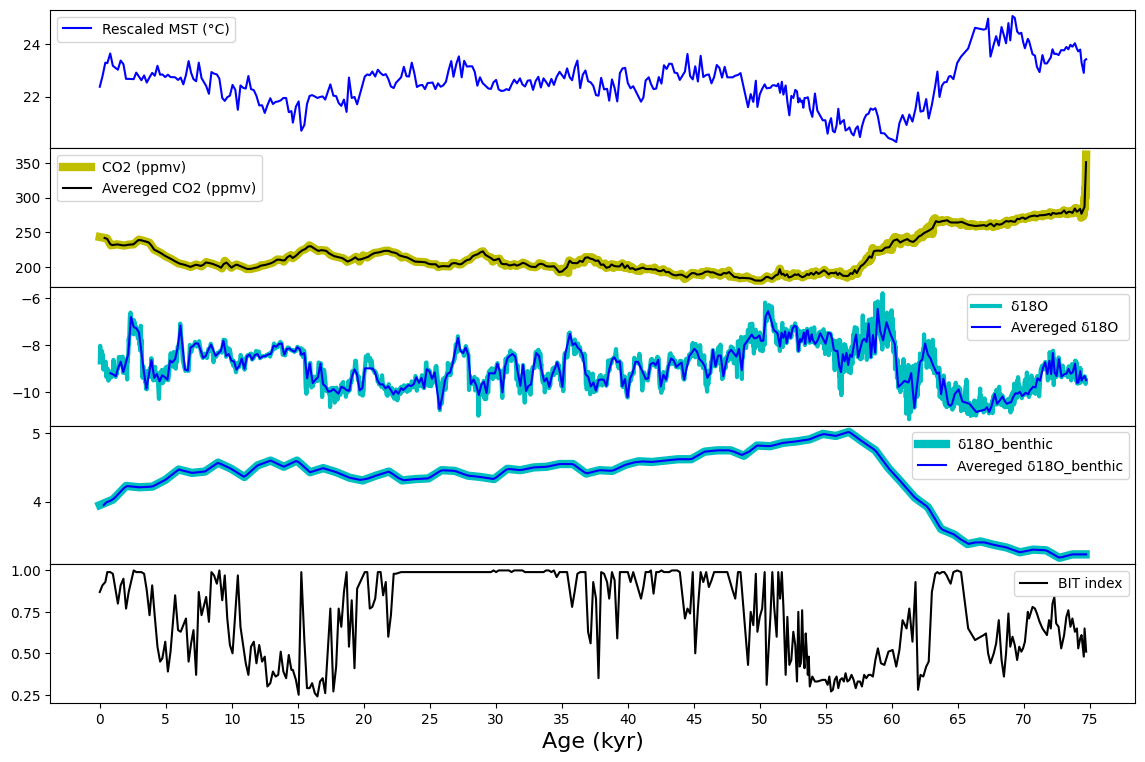

In [128]:
fig = plt.figure(figsize=(14,9))
fig.tight_layout()
fig.subplots_adjust(hspace=0.0001)
plt.subplot(511)
plt.plot(np.max(age) - age, MST, label = 'Rescaled MST (°C)', color = 'b' )
plt.xticks([])
plt.legend()
plt.subplot(512)
plt.plot(np.max(age) - gasage / 1000, co2, label = 'CO2 (ppmv)', color = 'y',linewidth = 6.0  )
plt.plot(np.max(age) - age, new_co2, label = 'Avereged CO2 (ppmv)', color = 'k' )
plt.xticks([])
plt.legend()
plt.subplot(513)
plt.plot(np.max(age) - age_kp, s180, label = 'δ18O ', color = 'c', linewidth = 3.0 )
plt.plot(np.max(age) - age, new_s180, label = 'Avereged δ18O ', color = 'b' )
plt.xticks([])
plt.legend()
plt.subplot(514)
plt.plot(np.max(age) - age_calka , d18O, label = 'δ18O_benthic', color = 'c', linewidth = 6.0  )
plt.plot(np.max(age) - age, new_d18O, label = 'Avereged δ18O_benthic', color = 'b' )
plt.xticks([])
plt.legend()
plt.subplot(515)
plt.plot(np.max(age) - age, bit, label = 'BIT index', color = 'k' )
plt.xticks(range(0, 80, 5))
plt.xlabel('Age (kyr)', fontsize = 16)
plt.legend()
plt.savefig("input.png") 
plt.show()